In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
full_df=pd.read_csv("C:/Users/Maniv/Downloads/train_data.csv/train_data.csv")
train_df = full_df.sample(n=int(0.2*full_df.shape[0]))

labels_train = pd.read_csv("C:/Users/Maniv/Downloads/train_labels.csv/train_labels.csv")
lables_df = labels_train.sample(n=int(0.2*labels_train.shape[0]))
dataframe = pd.merge(train_df, lables_df, on=["customer_ID"])
dataframe.to_csv('merge_df.csv')
train_df.shape

(1106290, 190)

In [3]:
dataframe.shape

(221320, 191)

In [4]:
dataframe.isna().sum()

customer_ID         0
S_2                 0
P_2              1894
D_39                0
B_1                 0
                ...  
D_142          184037
D_143            4046
D_144            1629
D_145            4046
target              0
Length: 191, dtype: int64

In [5]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2,219426.0,0.656859,0.244916,-3.923312e-01,0.480506,0.695516,0.865370,1.010000
D_39,221320.0,0.153060,0.271132,3.785832e-08,0.004505,0.009052,0.236681,5.362196
B_1,221320.0,0.123512,0.211412,-5.309203e-01,0.008812,0.031015,0.125157,1.324027
B_2,221234.0,0.623196,0.400853,6.271178e-07,0.107224,0.814418,1.002378,1.010000
R_1,221320.0,0.079123,0.226655,3.121893e-08,0.002905,0.005793,0.008665,2.753595
...,...,...,...,...,...,...,...,...
D_142,37283.0,0.392722,0.237681,-1.047948e-02,0.200876,0.380844,0.562034,1.830842
D_143,217274.0,0.176448,0.376915,5.122518e-08,0.003013,0.006032,0.009051,1.010000
D_144,219691.0,0.050934,0.179041,1.113016e-07,0.002750,0.005507,0.008247,1.343312
D_145,217274.0,0.061407,0.191969,2.272003e-08,0.002998,0.006027,0.009045,4.277929


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221320 entries, 0 to 221319
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 322.5+ MB


In [7]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(dataframe.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [8]:
dataframe.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2017-08-10,0.957209,0.391724,0.028317,1.002893,0.002534,0.610997,0.006652,0.008481,...,NaN,NaN,0.006877,0.007111,0.004182,NaN,0.005423,0.002587,0.000314,0
1,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2017-05-29,0.944084,0.007620,0.009474,0.813454,0.003503,0.427354,0.003551,0.014739,...,NaN,NaN,0.001335,0.003553,0.002317,NaN,0.007416,0.009657,0.005637,0
2,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2018-01-22,1.006100,0.003129,0.002962,1.007772,0.002427,0.160613,0.268217,0.000437,...,NaN,NaN,NaN,0.006785,NaN,NaN,NaN,0.000110,NaN,0
3,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2017-11-15,0.998046,0.505732,0.015839,1.007921,0.002416,0.520754,0.002441,0.004454,...,NaN,NaN,0.008342,0.005560,0.002363,NaN,0.004932,0.000303,0.000992,0
4,1b4ff1e2daa1c17c4289841d912567c6f2542686532eda...,2018-02-12,0.680044,0.210057,0.058605,0.198005,0.008972,0.094241,0.506293,0.297965,...,NaN,NaN,0.009420,0.002825,0.000122,NaN,0.006602,0.006042,0.007382,0


In [9]:
encoding_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Performing one-hot encoding
dataframe2 = pd.get_dummies(dataframe, columns=encoding_columns)

In [10]:
dataframe2.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2017-08-10,0.957209,0.391724,0.028317,1.002893,0.002534,0.610997,0.006652,0.008481,...,False,False,False,False,False,False,False,False,True,False
1,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2017-05-29,0.944084,0.007620,0.009474,0.813454,0.003503,0.427354,0.003551,0.014739,...,False,False,False,False,False,False,False,False,True,False
2,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2018-01-22,1.006100,0.003129,0.002962,1.007772,0.002427,0.160613,0.268217,0.000437,...,False,False,False,False,False,False,False,False,True,False
3,1f80ee0596bb893c196f5f7eb4a25cce3cbac5d518221a...,2017-11-15,0.998046,0.505732,0.015839,1.007921,0.002416,0.520754,0.002441,0.004454,...,False,False,False,False,False,False,False,False,True,False
4,1b4ff1e2daa1c17c4289841d912567c6f2542686532eda...,2018-02-12,0.680044,0.210057,0.058605,0.198005,0.008972,0.094241,0.506293,0.297965,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(dataframe2.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [12]:
columns_numeric_tolist = dataframe2.select_dtypes(include=np.float64).columns.tolist()
agg_data = dataframe2.groupby('customer_ID')[columns_numeric_tolist].mean()
agg_data

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.937272,0.003753,0.010977,1.001198,0.002596,0.117345,0.003670,0.005360,NaN,NaN,...,NaN,NaN,NaN,0.004156,0.005378,0.004595,NaN,0.006609,0.007212,0.008734
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.914856,0.122739,0.019689,1.004674,0.008222,0.109772,0.007456,0.004528,NaN,NaN,...,NaN,NaN,NaN,0.005060,0.003942,0.005545,NaN,0.005252,0.006726,0.007849
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.371713,0.022543,0.075230,0.085779,0.002347,0.374926,0.005536,0.127857,0.140790,0.116793,...,NaN,NaN,NaN,0.002742,0.007005,0.007276,NaN,0.001589,0.005763,0.008564
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,0.402065,0.056200,0.935008,0.026486,0.005961,0.168381,0.006773,1.169516,NaN,0.032567,...,NaN,NaN,NaN,1.003781,0.005803,0.870605,0.159827,1.003500,0.003195,0.729808
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,1.000060,0.005221,0.007327,0.814819,0.003837,0.285717,0.003322,0.006003,NaN,0.042159,...,NaN,NaN,NaN,0.006616,0.006374,0.005016,NaN,0.004298,0.003644,0.003943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe13e28dc3ceadf28249b596ba25df93e38ec53d38cf28ee13d50d4b7b1a22,0.329871,0.207513,0.077591,0.002426,0.001373,0.170066,0.007823,0.006108,0.177996,NaN,...,NaN,NaN,NaN,NaN,0.003907,NaN,NaN,NaN,0.008965,NaN
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88,0.524068,0.062651,1.097255,0.415575,0.003920,1.148185,0.002535,0.184250,0.072800,0.415407,...,NaN,NaN,NaN,0.006562,0.005778,0.003243,NaN,0.009093,0.006030,0.004314
fffe6355ed80789ab8c3ba18a4d10acc52964106ae7b984686c5c3eafde6a450,0.876457,0.065360,0.024184,0.910152,0.004453,0.137685,0.004634,0.005536,NaN,NaN,...,NaN,NaN,NaN,0.004231,0.005182,0.005378,NaN,0.005515,0.004182,0.003981


In [13]:
columns_int_tolist = dataframe2.select_dtypes(include=np.int64).columns.tolist()
agg_int_data = dataframe2.groupby('customer_ID')[columns_int_tolist].mean()
agg_int_data.head()
#agg(['mean','median','std']).plot.bar()

,B_31,target
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,1.0,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1.0,0.0
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,1.0,0.0
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1.0,1.0
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,1.0,0.0


In [14]:
columns_binary_tolist = dataframe2.select_dtypes(include=np.uint8).columns.tolist()
agg_binary_data = dataframe2.groupby('customer_ID')[columns_binary_tolist].mean()
agg_binary_data

""
customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36
...
fffe13e28dc3ceadf28249b596ba25df93e38ec53d38cf28ee13d50d4b7b1a22
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88
fffe6355ed80789ab8c3ba18a4d10acc52964106ae7b984686c5c3eafde6a450


In [15]:
data_merging = pd.merge(agg_binary_data, agg_int_data, on='customer_ID')

# Join merged_data with average_data on a common column (e.g., customer_ID)
data_avg_merge = pd.merge(data_merging, agg_data, on='customer_ID')
#data = average_data.join(grouped_data)
data_avg_merge.head()

,B_31,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,1.0,0.0,0.937272,0.003753,0.010977,1.001198,0.002596,0.117345,0.003670,0.005360,...,NaN,NaN,NaN,0.004156,0.005378,0.004595,NaN,0.006609,0.007212,0.008734
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1.0,0.0,0.914856,0.122739,0.019689,1.004674,0.008222,0.109772,0.007456,0.004528,...,NaN,NaN,NaN,0.005060,0.003942,0.005545,NaN,0.005252,0.006726,0.007849
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,1.0,0.0,0.371713,0.022543,0.075230,0.085779,0.002347,0.374926,0.005536,0.127857,...,NaN,NaN,NaN,0.002742,0.007005,0.007276,NaN,0.001589,0.005763,0.008564
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1.0,1.0,0.402065,0.056200,0.935008,0.026486,0.005961,0.168381,0.006773,1.169516,...,NaN,NaN,NaN,1.003781,0.005803,0.870605,0.159827,1.003500,0.003195,0.729808
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,1.0,0.0,1.000060,0.005221,0.007327,0.814819,0.003837,0.285717,0.003322,0.006003,...,NaN,NaN,NaN,0.006616,0.006374,0.005016,NaN,0.004298,0.003644,0.003943


In [16]:
to_check_duplicates =data_avg_merge.duplicated().sum()
to_check_duplicates

0

In [17]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(data_avg_merge.dtypes)

B_31      float64
target    float64
P_2       float64
D_39      float64
B_1       float64
B_2       float64
R_1       float64
S_3       float64
D_41      float64
B_3       float64
D_42      float64
D_43      float64
D_44      float64
B_4       float64
D_45      float64
B_5       float64
R_2       float64
D_46      float64
D_47      float64
D_48      float64
D_49      float64
B_6       float64
B_7       float64
B_8       float64
D_50      float64
D_51      float64
B_9       float64
R_3       float64
D_52      float64
P_3       float64
B_10      float64
D_53      float64
S_5       float64
B_11      float64
S_6       float64
D_54      float64
R_4       float64
S_7       float64
B_12      float64
S_8       float64
D_55      float64
D_56      float64
B_13      float64
R_5       float64
D_58      float64
S_9       float64
B_14      float64
D_59      float64
D_60      float64
D_61      float64
B_15      float64
S_11      float64
D_62      float64
D_65      float64
B_16      float64
B_17      

In [18]:
data_avg_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83256 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6
Columns: 178 entries, B_31 to D_145
dtypes: float64(178)
memory usage: 113.7+ MB


In [19]:
X_train,X_test1, Y_train, Y_test1 = train_test_split(data_avg_merge.drop('target', axis=1), data_avg_merge['target'], test_size=0.3, random_state=24)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=24)

In [20]:
X_train.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test1.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test2.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import xgboost as xgb

In [23]:
xgb_instance = xgb.XGBClassifier()

In [24]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train,Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

In [25]:
model_for_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
1,P_2,0.222721
3,B_1,0.053661
25,B_9,0.022571
32,B_11,0.020420
5,R_1,0.018676
...,...,...
0,B_31,0.002074
117,D_92,0.002002
159,B_42,0.001743
142,B_39,0.001614


In [27]:
# choose featires with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train[final_features]
X1_test1 = X_test1[final_features]
X1_test2 = X_test2[final_features]
final_features

1        P_2
3        B_1
25       B_9
32      B_11
5        R_1
9       D_42
18      D_48
8        B_3
4        B_2
6        S_3
136     R_26
21       B_7
11      D_44
13      D_45
10      D_43
124     S_23
68      B_23
24      D_51
19      D_49
28       P_3
23      D_50
162    D_132
12       B_4
7       D_41
26       R_3
16      D_46
36       S_7
14       B_5
140    D_110
52      D_65
54      B_17
Name: Feature, dtype: object

In [28]:
final_fit_model= xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
final_fit_model.fit(X_train, Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
##feature_importance = model.feature_importances_

model_feature_importance = {'Feature':X_train.columns,'Importance':final_fit_model.feature_importances_}
model_feature_importance = pd.DataFrame(model_feature_importance)
model_feature_importance.sort_values("Importance", inplace=True,ascending=False)
model_feature_importance

,Feature,Importance
18,D_48,0.181243
3,B_1,0.075357
1,P_2,0.027029
9,D_42,0.024812
22,B_8,0.019392
...,...,...
2,D_39,0.002453
96,R_15,0.002439
159,B_42,0.002259
0,B_31,0.001123


In [30]:
#feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# choose featires with FI higher than 0.5%

final_features_FI = model_feature_importance["Feature"][model_feature_importance.Importance > 0.005]

X2_train = X_train[final_features_FI]
X2_test1 = X_test1[final_features_FI]
X2_test2 = X_test2[final_features_FI]
final_features_FI

18      D_48
3        B_1
1        P_2
9       D_42
22       B_8
36       S_7
23      D_50
51      D_62
11      D_44
6        S_3
30      D_53
26       R_3
5        R_1
78      B_26
14       B_5
124     S_23
24      D_51
72      D_75
10      D_43
126     S_25
71      D_74
143    D_112
32      B_11
Name: Feature, dtype: object

In [31]:
merged_feature_importance = pd.concat([feature_importance, model_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train[filtered_features]
X3_test1 = X_test1[filtered_features]
X3_test2 = X_test2[filtered_features]

In [32]:
#Here we do grid search only on #trees, and look at the AUC as performance metric.

from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","subsample","colsample_bytree","scale_pos_weight", "AUC Train", "AUC Test1","AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsample in [0.5,0.8]:
        for colsample_bytree in [0.5,1.0]:
            for scale_pos_weight in [1,5,10]:
               xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR,subsample=subsample,colsample_bytree=colsample_bytree,scale_pos_weight=scale_pos_weight)
               model = xgb_instance.fit(X3_train, Y_train)

               table.loc[row,"Num Trees"] = num_trees
               table.loc[row,"Learning Rate"] = LR
               table.loc[row,"subsample"] = subsample
               table.loc[row,"colsample_bytree"] = colsample_bytree
               table.loc[row,"scale_pos_weight"] = scale_pos_weight
               table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X3_train)[:,1])
               table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, model.predict_proba(X3_test1)[:,1])
               table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, model.predict_proba(X3_test2)[:,1])



               row = row + 1

table

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,Num Trees,Learning Rate,subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.939583,0.930717,0.928992
1,50,0.01,0.5,0.5,5,0.937375,0.928811,0.92783
2,50,0.01,0.5,0.5,10,0.935984,0.927319,0.926602
3,50,0.01,0.5,1.0,1,0.937569,0.927477,0.927101
4,50,0.01,0.5,1.0,5,0.934657,0.924704,0.924647
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.984942,0.93598,0.933862
68,300,0.1,0.8,0.5,10,0.983393,0.935668,0.933662
69,300,0.1,0.8,1.0,1,0.988051,0.936734,0.933867
70,300,0.1,0.8,1.0,5,0.987345,0.93598,0.933182


In [33]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")

Num Trees                100
Learning Rate            0.1
subsample                0.8
colsample_bytree         0.5
scale_pos_weight           1
AUC Train           0.961961
AUC Test1           0.938534
AUC Test2            0.93572
Name: 42, dtype: object


In [34]:
Finalized_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

# Fit the model on the training data
Finalized_model = Finalized_xgb.fit(X3_train, Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

In [35]:
Finalized_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": Y_train, "Prediction": Finalized_model.predict_proba(X3_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
statistics = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00163]",0.0,5828,0.000000
"(0.00163, 0.00303]",1.0,5828,0.000172
"(0.00303, 0.00598]",6.0,5828,0.001030
"(0.00598, 0.0141]",11.0,5828,0.001887
"(0.0141, 0.0396]",67.0,5828,0.011496
"(0.0396, 0.144]",322.0,5827,0.055260
"(0.144, 0.385]",1209.0,5828,0.207447
"(0.385, 0.637]",2894.0,5828,0.496568
"(0.637, 0.832]",4674.0,5828,0.801990


In [37]:
statistics = statistics.reset_index()

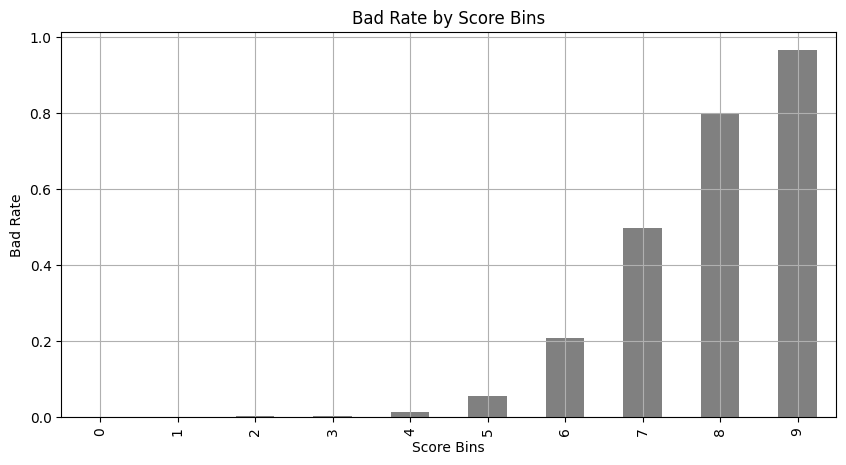

In [38]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
statistics['Bad Rate'].plot(kind='bar', color='grey')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()

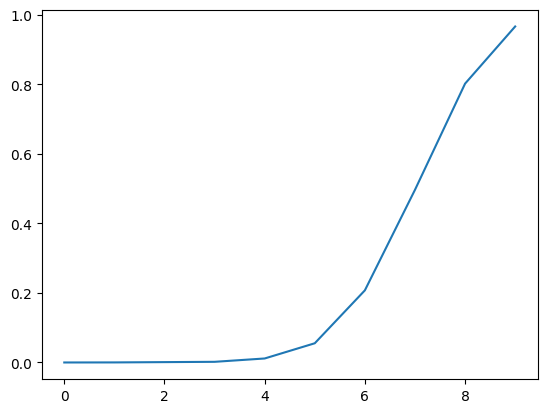

In [39]:
plt.plot(statistics["Bad Rate"])

In [40]:
performance = pd.DataFrame({"Actual": Y_test1, "Prediction": Finalized_model.predict_proba(X3_test1)[:,1]})

performance["Score Bins"] = pd.cut(performance["Prediction"], quantiles)
statistics = performance.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00163]",1.0,1275,0.000784
"(0.00163, 0.00303]",4.0,1285,0.003113
"(0.00303, 0.00598]",5.0,1224,0.004085
"(0.00598, 0.0141]",21.0,1240,0.016935
"(0.0141, 0.0396]",46.0,1222,0.037643
"(0.0396, 0.144]",117.0,1215,0.096296
"(0.144, 0.385]",351.0,1272,0.275943
"(0.385, 0.637]",610.0,1229,0.496338
"(0.637, 0.832]",934.0,1276,0.731975


In [41]:
performance = pd.DataFrame({"Actual": Y_test2, "Prediction": Finalized_model.predict_proba(X3_test2)[:,1]})

performance["Score Bins"] = pd.cut(performance["Prediction"], quantiles)
statistics = performance.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00163]",2.0,1227,0.001630
"(0.00163, 0.00303]",5.0,1211,0.004129
"(0.00303, 0.00598]",9.0,1264,0.007120
"(0.00598, 0.0141]",17.0,1256,0.013535
"(0.0141, 0.0396]",39.0,1272,0.030660
"(0.0396, 0.144]",117.0,1318,0.088771
"(0.144, 0.385]",370.0,1302,0.284178
"(0.385, 0.637]",641.0,1245,0.514859
"(0.637, 0.832]",906.0,1251,0.724221


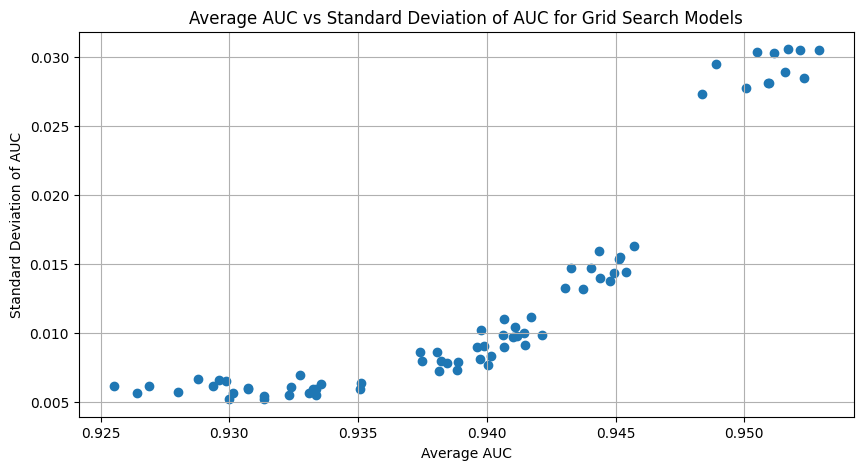

In [42]:
# Calculate average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC for Grid Search Models)
plt.figure(figsize=(10, 5))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

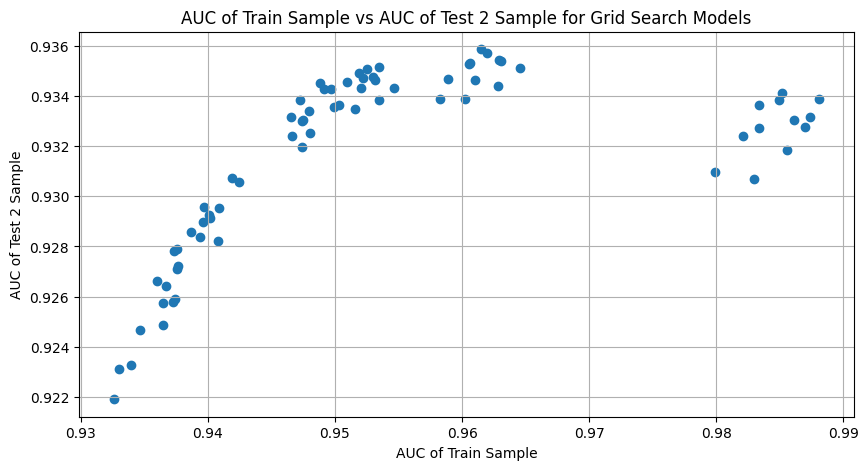

In [43]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()

In [44]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [46]:
explainer = shap.Explainer(Finalized_model)
calc_shap_values = explainer(X3_test2)

[20:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


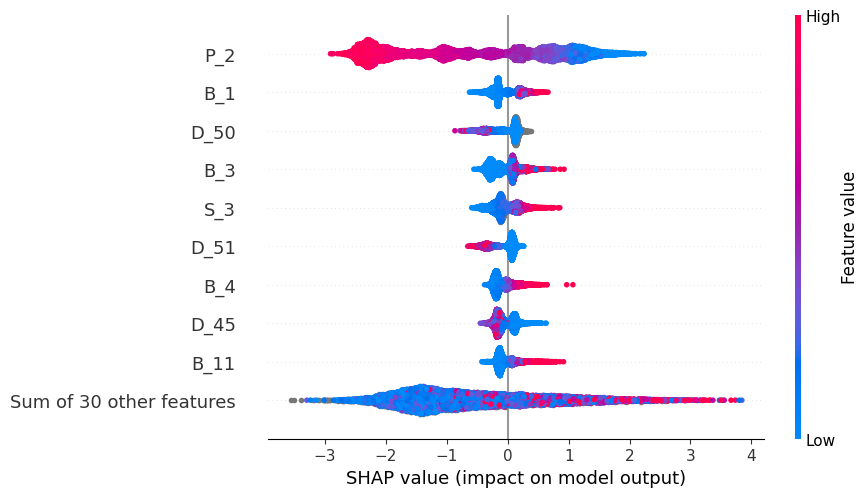

In [47]:
shap.plots.beeswarm(calc_shap_values)

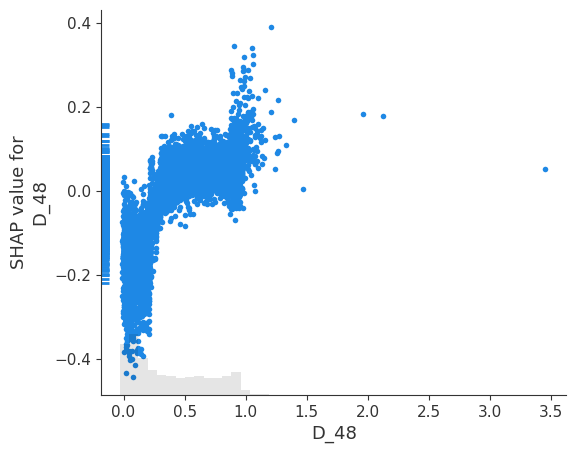

In [48]:
shap.plots.scatter(calc_shap_values[:,"D_48"])

In [49]:
#shap.plots.scatter(calc_shap_values[:,"D_48"], color=calc_shap_values[:,"B_33"])

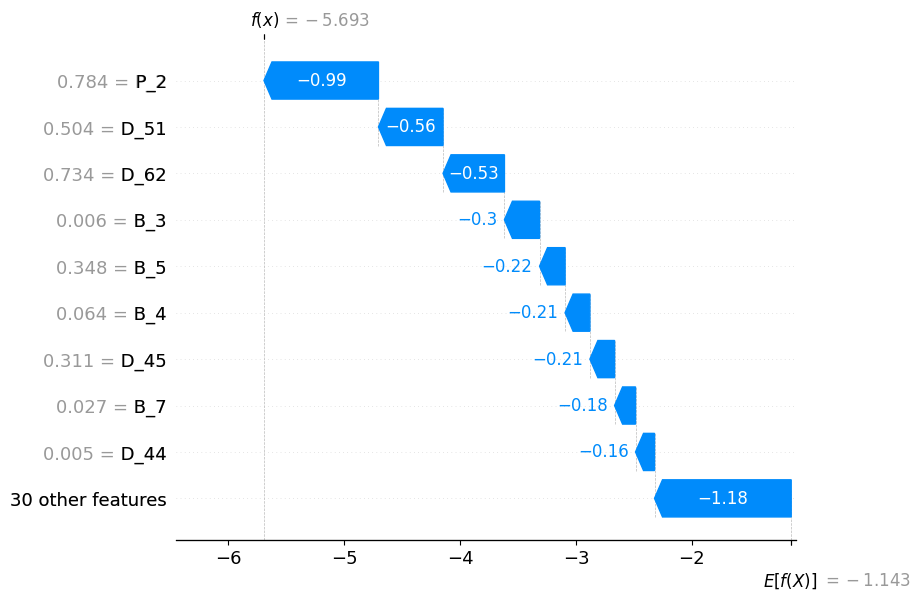

In [50]:
shap.plots.waterfall(calc_shap_values[10])

In [51]:
import shap
explainer = shap.Explainer(Finalized_model)
shap_values = explainer.shap_values(X3_train)

# Compute mean absolute SHAP values for each feature
mean_absolute_values = np.mean(np.abs(shap_values), axis=0)

# Get feature names
to_get_feature = X3_train.columns

# Create a DataFrame of feature importances
df_FI = pd.DataFrame({
    'feature': to_get_feature,
    'importance': mean_absolute_values
})

# Sort DataFrame by importance
df_FI = df_FI.sort_values('importance', ascending=False)

# Get top 5 features
head_features = df_FI['feature'].head(5).values

# Calculate summary statistics for top 5 features
final_stat = X3_train[head_features].describe()

# Print the summary statistics
final_stat .transpose()

[20:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[20:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_d

,count,mean,std,min,25%,50%,75%,max
P_2,57851.0,0.652038,0.240337,-0.392331,0.473475,0.686708,0.859974,1.010000
B_1,58279.0,0.124462,0.202823,-0.186994,0.010786,0.035753,0.133859,1.323619
D_50,25810.0,0.175359,0.486086,-3.741226,0.064158,0.108272,0.185659,28.133093
B_3,58264.0,0.130083,0.223479,0.000003,0.005585,0.010428,0.160217,1.379275
S_3,49470.0,0.228521,0.181509,-0.301897,0.131390,0.168005,0.266900,2.632879


In [52]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
X3_test1 = X3_test1[X3_train.columns] 
print(X3_test1.columns)
# Predict default probabilities on the test set
predicted_default = Finalized_model.predict_proba(X3_test1)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)

# Define the function that calculates default rate and expected revenue
def defrate_expecrev(dataframe2, threshold):
    customers_data = dataframe2[dataframe2["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    default_rate = customers_data['target'].mean()

    # Calculate portfolio expected revenue
    customers_data["Monthly_Revenue"] = customers_data["B_2"]*0.02 + customers_data["D_42"]*0.001
    expected_revenue = (customers_data[customers_data["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return default_rate, expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = defrate_expecrev(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")



Index(['B_1', 'B_11', 'B_17', 'B_2', 'B_23', 'B_26', 'B_3', 'B_4', 'B_5',
       'B_7', 'B_8', 'B_9', 'D_110', 'D_112', 'D_132', 'D_41', 'D_42', 'D_43',
       'D_44', 'D_45', 'D_46', 'D_48', 'D_49', 'D_50', 'D_51', 'D_53', 'D_62',
       'D_65', 'D_74', 'D_75', 'P_2', 'P_3', 'R_1', 'R_26', 'R_3', 'S_23',
       'S_25', 'S_3', 'S_7'],
      dtype='object')
Threshold: 0.1, Default Rate: 0.02124068082712055, Expected Revenue: 105.22067703200388
Threshold: 0.2, Default Rate: 0.03369634849455477, Expected Revenue: 123.44283063665847
Threshold: 0.3, Default Rate: 0.04897959183673469, Expected Revenue: 136.08082833455586
Threshold: 0.4, Default Rate: 0.0646188850967008, Expected Revenue: 148.4663606971133
Threshold: 0.5, Default Rate: 0.08267588890089701, Expected Revenue: 158.46449921046823


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [53]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target']) 

# Subsetting X3_test1 with the columns of X3_train
X3_test2 = X3_test2[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test2['predicted_default'] = predicted_default
X3_test2 = X3_test2.assign(target = Y_test2.values)
# Define the function that calculates default rate and expected revenue
def defrate_expecrev(dataframe2, threshold):
    customers_data = dataframe2[dataframe2["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    default_rate = customers_data['target'].mean()

    # Calculate portfolio expected revenue
    customers_data["Monthly_Revenue"] = customers_data["B_2"]*0.02 + customers_data["S_3"]*0.001
    expected_revenue = (customers_data[customers_data["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return default_rate, expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = defrate_expecrev(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1, Default Rate: 0.019343167269691066, Expected Revenue: 1132.9078289683162
Threshold: 0.2, Default Rate: 0.03369935630443014, Expected Revenue: 1197.2707807049885
Threshold: 0.3, Default Rate: 0.047534586732884, Expected Revenue: 1234.0456857119561
Threshold: 0.4, Default Rate: 0.06591928251121076, Expected Revenue: 1256.655038978966
Threshold: 0.5, Default Rate: 0.08410716191696019, Expected Revenue: 1277.7547094530598


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [54]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = prob_test

# Divide df2 based on date
divide_may17_jan18 = dataframe2[(dataframe2['S_2'] >= '2017-05-01') & (dataframe2['S_2'] <= '2018-01-31')]
divide_mar17_apr17 = dataframe2[(dataframe2['S_2'] >= '2017-03-01') & (dataframe2['S_2'] <= '2017-04-30')]
divide_feb18_mar18 = dataframe2[(dataframe2['S_2'] >= '2018-02-01') & (dataframe2['S_2'] <= '2018-03-31')]

divide_may17_jan18["predicted_default"] = Finalized_model.predict_proba(divide_may17_jan18[filtered_features])[:, 1]
divide_mar17_apr17["predicted_default"] = Finalized_model.predict_proba(divide_mar17_apr17[filtered_features])[:, 1]
divide_feb18_mar18["predicted_default"] = Finalized_model.predict_proba(divide_feb18_mar18[filtered_features])[:, 1]

# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = defrate_expecrev(divide_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = defrate_expecrev(divide_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = defrate_expecrev(divide_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be

Threshold: 0.1
May 2017 - Jan 2018, Default Rate: 0.019269534319587278, Expected Revenue: 13436.454682800715
March 2017 - April 2017, Default Rate: 0.025307151107844168, Expected Revenue: 2929.219071077711
February 2018 - March 2018, Default Rate: 0.010821877742029834, Expected Revenue: 3132.085159450899
Threshold: 0.2
May 2017 - Jan 2018, Default Rate: 0.0337773842859496, Expected Revenue: 14254.58639640833
March 2017 - April 2017, Default Rate: 0.04417253271602022, Expected Revenue: 3105.7797456640337
February 2018 - March 2018, Default Rate: 0.018811002661934337, Expected Revenue: 3320.617084678075
Threshold: 0.3
May 2017 - Jan 2018, Default Rate: 0.048449948878214404, Expected Revenue: 14669.236955442393
March 2017 - April 2017, Default Rate: 0.06303762847942124, Expected Revenue: 3194.7964488428834
February 2018 - March 2018, Default Rate: 0.028866669455716854, Expected Revenue: 3413.183462310289
Threshold: 0.4
May 2017 - Jan 2018, Default Rate: 0.06583983378289714, Expected Reven

In [55]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = prob_test

def calculate_metrics(df, threshold):    
    accepted_customers = df[df["predicted_default"] < threshold].copy()        # Calculate portfolio default rate    
    portfolio_default_rate = accepted_customers['target'].mean()
    # Calculate portfolio expected revenue    
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001    
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()        
    return portfolio_default_rate, portfolio_expected_revenue

dataframe2["predicted_default"] = Finalized_model.predict_proba(dataframe2[filtered_features])[:, 1]

# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(dataframe2, threshold)
    print(f"Mar 2017 - Mar 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Threshold: 0.1
Mar 2017 - Mar 2018, Default Rate: 0.018811780131431217, Expected Revenue: 19497.75891332932
Threshold: 0.2
Mar 2017 - Mar 2018, Default Rate: 0.032944484283918975, Expected Revenue: 20680.983226750443
Threshold: 0.3
Mar 2017 - Mar 2018, Default Rate: 0.04753537531781212, Expected Revenue: 21277.21686659557
Threshold: 0.4
Mar 2017 - Mar 2018, Default Rate: 0.06467173575341345, Expected Revenue: 21708.69385276785
Threshold: 0.5
Mar 2017 - Mar 2018, Default Rate: 0.0849541481331314, Expected Revenue: 22033.14278978152
Threshold: 0.6
Mar 2017 - Mar 2018, Default Rate: 0.11022745886592522, Expected Revenue: 22299.054212799416
Threshold: 0.7
Mar 2017 - Mar 2018, Default Rate: 0.14071611880892293, Expected Revenue: 22497.136769559253
Threshold: 0.8
Mar 2017 - Mar 2018, Default Rate: 0.17602598852441703, Expected Revenue: 22655.495737531586
Threshold: 0.9
Mar 2017 - Mar 2018, Default Rate: 0.21621634410637391, Expected Revenue: 22733.872283669585


In [56]:
X3_test2 = X3_test2[filtered_features]
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]
X3_test2['predicted_default'] = prob_test

# Divide df2 based on date
divide_may17_jan18 = dataframe2[(dataframe2['S_2'] >= '2017-05-01') & (dataframe2['S_2'] <= '2018-01-31')]
divide_mar17_apr17 = dataframe2[(dataframe2['S_2'] >= '2017-03-01') & (dataframe2['S_2'] <= '2017-04-30')]
divide_feb18_mar18 = dataframe2[(dataframe2['S_2'] >= '2018-02-01') & (dataframe2['S_2'] <= '2018-03-31')]

# Add predicted default probabilities to each time period
divide_may17_jan18["predicted_default"] = Finalized_model.predict_proba(divide_may17_jan18[filtered_features])[:, 1]
divide_mar17_apr17["predicted_default"] = Finalized_model.predict_proba(divide_mar17_apr17[filtered_features])[:, 1]
divide_feb18_mar18["predicted_default"] = Finalized_model.predict_proba(divide_feb18_mar18[filtered_features])[:, 1]

# Function to calculate the number of defaults based on a threshold
def num_defaults_thres(df, threshold):
    # Classify customers as defaulted if their predicted default probability is above the threshold
    df['is_defaulted'] = df['predicted_default'].apply(lambda x: 1 if x > threshold else 0)
    # Calculate number of defaulted customers
    default_customer = df['is_defaulted'].sum()
    return default_customer

# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_may17_jan18 = num_defaults_thres(divide_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_may17_jan18}")

    num_defaults_mar17_apr17 = num_defaults_thres(divide_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Number of defaulted customers: {num_defaults_mar17_apr17}")

    num_defaults_feb18_mar18 = num_defaults_thres(divide_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Number of defaulted customers: {num_defaults_feb18_mar18}")

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 65001
March 2017 - April 2017, Number of defaulted customers: 12850
February 2018 - March 2018, Number of defaulted customers: 16102
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 55672
March 2017 - April 2017, Number of defaulted customers: 10729
February 2018 - March 2018, Number of defaulted customers: 14076
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 49134
March 2017 - April 2017, Number of defaulted customers: 9227
February 2018 - March 2018, Number of defaulted customers: 12713
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 43072
March 2017 - April 2017, Number of defaulted customers: 7812
February 2018 - March 2018, Number of defaulted customers: 11433
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 36976
March 2017 - April 2017, Number of defaulted customers: 6506
February 2018 - March 2018, Number of defaulted customers: 10124
Thr

In [57]:
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = prob_test

# Add predicted default probabilities to each time period
dataframe2["predicted_default"] = Finalized_model.predict_proba(dataframe2[filtered_features])[:, 1]

# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    default_cust_mar17_mar18 = num_defaults_thres(dataframe2, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {default_cust_mar17_mar18}")

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 93953
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 80477
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 71074
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 62317
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 53606
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 44277
Threshold: 0.7
May 2017 - Jan 2018, Number of defaulted customers: 33893
Threshold: 0.8
May 2017 - Jan 2018, Number of defaulted customers: 22463
Threshold: 0.9
May 2017 - Jan 2018, Number of defaulted customers: 9990


In [2]:

# Load the data (adjust as needed)

# Convert 'S_2' to Unix timestamp
df['S_2'] = (df['S_2'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Assuming that 'target_x' is the name of your target variable
X = df.drop(['target_x', 'customer_ID'], axis=1)  # dropping non-numerical columns
y = df['target_x']

# Convert target to int from bool for compatibility with XGBClassifier
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the NN model with the best parameters
nn_model = Sequential()
nn_model.add(Dense(6, activation='tanh', input_dim=X_train.shape[1]))
for _ in range(2 - 1):
    nn_model.add(Dense(6, activation='tanh'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
nn_model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=0)

# Save the NN model
nn_model.save('final_model.h5')

# Load and train the XGB model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc')
xgb_model.fit(X_train, y_train)

# Save the XGB model
xgb_model.save_model('final_xgb_model.json')

# Compare models based on AUC
nn_pred = nn_model.predict(X_test)
nn_auc = roc_auc_score(y_test, nn_pred)

xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_pred)

print(f"NN AUC: {nn_auc}, XGB AUC: {xgb_auc}")

# Select the best model
best_model = nn_model if nn_auc > xgb_auc else xgb_model

# Calculate B_Ave and S_Ave
# Assuming 'B_feature' and 'S_feature' are the names of your balance and spend features
# Replace them with your actual feature names
B_Ave = df['B_1_x'].mean()
S_Ave = df['B_2_x'].mean()

# Calculate Monthly Revenue for each customer and Total Revenue
df['Monthly_Revenue'] = B_Ave * 0.02 + S_Ave * 0.001
df['Total_Revenue_12_Months'] = df['Monthly_Revenue'] * 12

# Define your conservative and aggressive thresholds
conservative_threshold = 0.3  # adjust as needed
aggressive_threshold = 0.7  # adjust as needed

# Add best model predictions to the dataframe
if isinstance(best_model, Sequential):  # NN model
    df['predictions'] = nn_model.predict(X)
else:  # XGB model
    df['predictions'] = xgb_model.predict_proba(X)[:, 1]

# Calculate Portfolio's Default Rate and Revenue for each strategy
for strategy, threshold in [('Conservative', conservative_threshold), ('Aggressive', aggressive_threshold)]:
    accepted = df[df['predictions'] < threshold]
    default_rate = accepted['target_x'].mean()
    revenue = accepted['Total_Revenue_12_Months'].sum()
    print(f"{strategy} Strategy: Default Rate = {default_rate}, Revenue = {revenue}")


NameError: name 'df2' is not defined